In [1]:
# data processing
import pandas as pd 

from scipy import stats
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Results.csv')

In [3]:
#Inspect the first 5 rows 
df.head()

,Temp,Date,Age,SL,Protocol_number,Equilibrium_loss,Induction,Loss_of_touch_response,RR_5M,Movement_post_anaesthesia,ER_post_anaesthesia,Notes
0,24.0,10/05/2019,29,8.0,1,75,80,120,111,253.0,243.0,NaN
1,24.0,10/05/2019,29,7.5,2,58,59,83,0,60.0,145.0,NaN
2,24.0,10/05/2019,29,7.5,3,30,31,40,0,342.0,351.0,NaN
3,25.0,10/05/2019,29,9.0,4,19,25,36,0,368.0,403.0,NaN
4,25.0,10/05/2019,29,6.5,5,202,120,324,0,1208.0,1368.0,NaN


In [4]:
protocolMS222_df=df.query('Protocol_number<3')

In [5]:
protocolMS222_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 19
Data columns (total 12 columns):
Temp                         8 non-null float64
Date                         8 non-null object
Age                          8 non-null int64
SL                           8 non-null float64
Protocol_number              8 non-null int64
Equilibrium_loss             8 non-null int64
Induction                    8 non-null int64
Loss_of_touch_response       8 non-null int64
RR_5M                        8 non-null int64
Movement_post_anaesthesia    8 non-null float64
ER_post_anaesthesia          8 non-null float64
Notes                        0 non-null object
dtypes: float64(4), int64(6), object(2)
memory usage: 832.0+ bytes


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Protocols 1 and 2
t = -0.5594291837142111
p = 0.5961177641859254
Protocols 3 and 4
t = nan
p = nan
Protocols 5 and 6
t = -0.06605932727299003
p = 0.9486326175171809


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


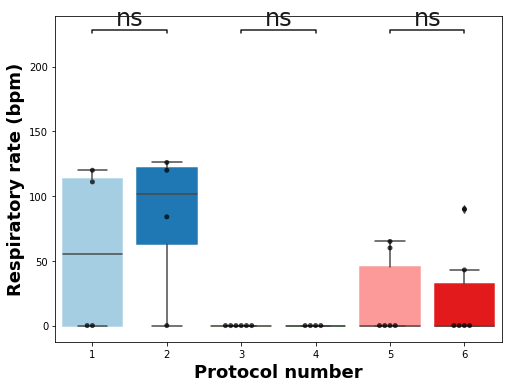

P1 recovery mean
57.75
P2 recovery mean
82.5
P3 recovery mean
0.0
P4 recovery mean
0.0
P5 recovery mean
20.833333333333332
P6 recovery mean
22.166666666666668


In [6]:
import seaborn as sns, matplotlib.pyplot as plt
protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
a=protocol1_df['RR_5M']
b=protocol2_df['RR_5M']
c=protocol3_df['RR_5M']
d=protocol4_df['RR_5M']
e=protocol5_df['RR_5M']
f=protocol6_df['RR_5M']
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)


tips = df.dropna(how='all')
ax=sns.boxplot(x="Protocol_number", y="RR_5M", data=tips)
# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="RR_5M", data=tips, color='black', alpha=0.75)

ax.set(xlabel='Protocol number', ylabel='Respiration rate (bpm)')
t2, p2 = stats.ttest_ind(a,b, nan_policy='omit')
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f, nan_policy='omit')
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)


for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['RR_5M'].max() + 100, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

    colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)
    
ax.set_xlabel('Protocol number', weight='bold').set_fontsize('18')
ax.set_ylabel('Respiratory rate (bpm)', weight='bold').set_fontsize('18')
    
plt.savefig('RR_bpm.png')
plt.savefig('RR_bpm.eps')
plt.show()

print('P1 recovery mean')
print(protocol1_df['RR_5M'].mean())
print('P2 recovery mean')
print(protocol2_df['RR_5M'].mean())
print('P3 recovery mean')
print(protocol3_df['RR_5M'].mean())
print('P4 recovery mean')
print(protocol4_df['RR_5M'].mean())
print('P5 recovery mean')
print(protocol5_df['RR_5M'].mean())
print('P6 recovery mean')
print(protocol6_df['RR_5M'].mean())








Protocols 1 and 2
t = 1.0466978803600602
p = 0.33556142153467905
Protocols 3 and 4
t = 2.868158421329449
p = 0.03507006489648838
Protocols 5 and 6
t = 2.5583895725533266
p = 0.02845164648272926


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

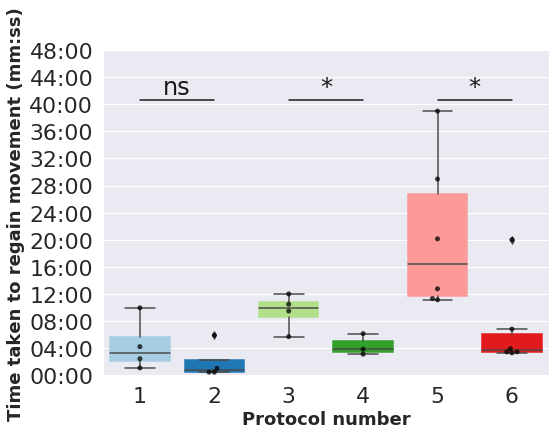

P1 recovery mean


KeyError: 'Recovery'

In [7]:
import seaborn as sns, matplotlib.pyplot as plt
protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
a=protocol1_df['Movement_post_anaesthesia']
b=protocol2_df['Movement_post_anaesthesia']
c=protocol3_df['Movement_post_anaesthesia']
d=protocol4_df['Movement_post_anaesthesia']
e=protocol5_df['Movement_post_anaesthesia']
f=protocol6_df['Movement_post_anaesthesia']
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)


tips = df.dropna(how='all')
ax=sns.boxplot(x="Protocol_number", y="Movement_post_anaesthesia", data=tips)
# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="Movement_post_anaesthesia", data=tips, color='black', alpha=0.75)
ax.set(ylim=(-10, 2750))
ax.set(xlabel='Protocol number', ylabel='Movement post anaesthesia (mm:ss)')
t2, p2 = stats.ttest_ind(a,b, nan_policy='omit')
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f, nan_policy='omit')
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)


for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Movement_post_anaesthesia'].max() + 100, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

    colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)

list=[]  
#In minutes
inc=max([np.int(np.round(tips['Movement_post_anaesthesia'].max()/600)),1])
additional_space=3*inc
y_lim_max=np.int(np.round(tips['Movement_post_anaesthesia'].max()/60))+additional_space
#In seconds
y_actual_max=y_lim_max*60
#additional space for extra plotting at the top (*'s etc.)
if y_lim_max>9:
        #If greater than 9 then change the increment size.
    if y_lim_max>=60:
            #If greater than 60 then the time formatting needs to change
        for time in np.arange(y_lim_max, step=inc):
            if time>=60:
                if 60-time<9:
                    list.append('01:0'+str(np.int(time-60))+':00')
                else:
                    list.append('01:'+str(np.int(time-60))+':00')
            elif time>9:
                list.append('00:'+str(np.int(time))+':00')
            else:
                list.append('00:0'+str(np.int(time))+':00')
    else:
        for time in np.arange(y_lim_max, step=inc):
            if time>9:
                list.append(str(time)+':00')
            else:
                list.append('0'+str(time)+':00')
            plt.yticks(np.arange(y_actual_max, step=inc*60), list)
elif y_lim_max>1:
    #For small values add :30 increments.
    for time in np.arange(y_lim_max, step=1):
        list.append('0'+str(time)+':00')
        list.append('0'+str(time)+':30')
    plt.yticks(np.arange(y_actual_max, step=30), list)
else: # Less than 1 minute
    for time in np.arange(y_lim_max*60, step=10):
        list.append('00:'+str(time))                
    plt.yticks(np.arange(y_actual_max, step=10), list)

ax.set_xlabel('Protocol number', weight='bold').set_fontsize('18')
ax.set_ylabel('Time taken to regain movement (mm:ss)', weight='bold').set_fontsize('18')
    
plt.savefig('Movement_post_anaesthesia.png',bbox_inches='tight')
plt.savefig('Movement_post_anaesthesia.eps',bbox_inches='tight')
plt.show()

print('P1 recovery mean')
print(protocol1_df['Recovery'].mean())
print('P2 recovery mean')
print(protocol2_df['Recovery'].mean())
print('P3 recovery mean')
print(protocol3_df['Recovery'].mean())
print('P4 recovery mean')
print(protocol4_df['Recovery'].mean())
print('P5 recovery mean')
print(protocol5_df['Recovery'].mean())
print('P6 recovery mean')
print(protocol6_df['Recovery'].mean())

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)


protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
a=protocol1_df['ER_post_anaesthesia']
b=protocol2_df['ER_post_anaesthesia']
c=protocol3_df['ER_post_anaesthesia']
d=protocol4_df['ER_post_anaesthesia']
e=protocol5_df['ER_post_anaesthesia']
f=protocol6_df['ER_post_anaesthesia']

tips = df.dropna(how='all')
ax=sns.boxplot(x="Protocol_number", y="ER_post_anaesthesia", data=tips)
# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="ER_post_anaesthesia", data=tips, color='black', alpha=0.75)
ax.set(ylim=(-10, 2750))
ax.set(xlabel='Protocol number', ylabel='Equilibrium Recovery post anaesthesia (mm:ss)')
t2, p2 = stats.ttest_ind(a,b, nan_policy='omit')
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f, nan_policy='omit')
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)



for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['ER_post_anaesthesia'].max() + 100, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)
colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)

list=[]  
#In minutes
inc=max([np.int(np.round(tips['ER_post_anaesthesia'].max()/600)),1])
additional_space=3*inc
y_lim_max=np.int(np.round(tips['ER_post_anaesthesia'].max()/60))+additional_space
#In seconds
y_actual_max=y_lim_max*60
#additional space for extra plotting at the top (*'s etc.)
if y_lim_max>9:
        #If greater than 9 then change the increment size.
    if y_lim_max>=60:
            #If greater than 60 then the time formatting needs to change
        for time in np.arange(y_lim_max, step=inc):
            if time>=60:
                if 60-time<9:
                    list.append('01:0'+str(np.int(time-60))+':00')
                else:
                    list.append('01:'+str(np.int(time-60))+':00')
            elif time>9:
                list.append('00:'+str(np.int(time))+':00')
            else:
                list.append('00:0'+str(np.int(time))+':00')
    else:
        for time in np.arange(y_lim_max, step=inc):
            if time>9:
                list.append(str(time)+':00')
            else:
                list.append('0'+str(time)+':00')
            plt.yticks(np.arange(y_actual_max, step=inc*60), list)
elif y_lim_max>1:
    #For small values add :30 increments.
    for time in np.arange(y_lim_max, step=1):
        list.append('0'+str(time)+':00')
        list.append('0'+str(time)+':30')
    plt.yticks(np.arange(y_actual_max, step=30), list)
else: # Less than 1 minute
    for time in np.arange(y_lim_max*60, step=10):
        list.append('00:'+str(time))                
    plt.yticks(np.arange(y_actual_max, step=10), list)    
    
ax.set_xlabel('Protocol number', weight='bold').set_fontsize('18')
ax.set_ylabel('Time taken to regain equilibrium (mm:ss)', weight='bold').set_fontsize('18')
    
plt.savefig('ER_post_anaesthesia.png',bbox_inches='tight')
plt.savefig('ER_post_anaesthesia.eps',bbox_inches='tight')
plt.show()





Protocols 1 and 2 and 3 and 4
t = 3.6487459496329504
p = 0.0021644431626713246
Protocols '3 and 4' and '5 and 6'
t = -4.404502318827302
p = 0.00027333144662129635
Protocols 5 and 6 and 1 and 2
t = -2.5668206895256716
p = 0.019404526575093745
Protocols 1 and 2
t = 0.5960162335242217
p = 0.572946385067815
Protocols 3 and 4
t = -0.1838813245129834
p = 0.8586819037954132
Protocols 5 and 6
t = -0.5155868453418231
p = 0.6173486496631618


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

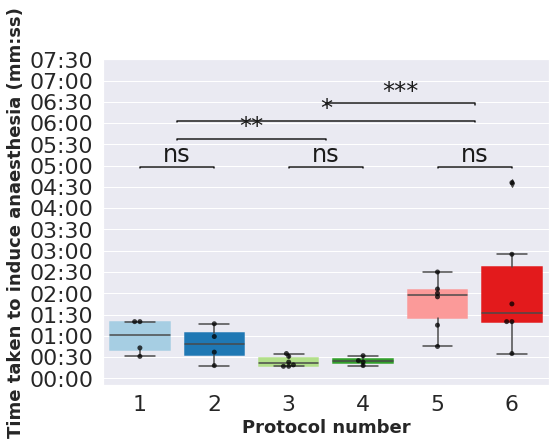

In [8]:
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)
protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
P1and2_df= pd.concat([protocol1_df, protocol2_df])

protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
P3and4_df= pd.concat([protocol3_df, protocol4_df])

protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
P5and6_df= pd.concat([protocol5_df, protocol6_df])

a=P1and2_df['Induction']
b=P3and4_df['Induction']
c=P5and6_df['Induction']

tips = df
ax=sns.boxplot(x="Protocol_number", y="Induction", data=tips)
# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="Induction", data=tips, color='black', alpha=0.75)
ax.set(ylim=(-10, 410))
ax.set(xlabel='Protocol number', ylabel='Induction (mm:ss)')
t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2 and 3 and 4")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(b,c)
print("Protocols '3 and 4' and '5 and 6'")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(a,c)
print("Protocols 5 and 6 and 1 and 2")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)


for i in range(3):
# statistical annotation
    x1 = i*2+0.5
    x2 = i*2+2.5 # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Induction'].max() + 60, 2, 'k'
    
    if i < 1:
       p=p2
     
    elif i == 1:
       p=p3
       y+=50
    else: 
       p=p4
       x1=0.5
       x2=4.5
       y=y+25
    
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')

a=protocol1_df['Induction']
b=protocol2_df['Induction']
c=protocol3_df['Induction']
d=protocol4_df['Induction']
e=protocol5_df['Induction']
f=protocol6_df['Induction']

tips = df.dropna(how='all')
t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f)
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

    
    
for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Induction'].max() + 20, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)
list=[]  
#In minutes
inc=max([np.int(np.round(tips['Induction'].max()/600)),1])
additional_space=3*inc
y_lim_max=np.int(np.round(tips['Induction'].max()/60))+additional_space
#In seconds
y_actual_max=y_lim_max*60
#additional space for extra plotting at the top (*'s etc.)
if y_lim_max>9:
        #If greater than 9 then change the increment size.
    if y_lim_max>=60:
            #If greater than 60 then the time formatting needs to change
        for time in np.arange(y_lim_max, step=inc):
            if time>=60:
                if 60-time<9:
                    list.append('01:0'+str(np.int(time-60))+':00')
                else:
                    list.append('01:'+str(np.int(time-60))+':00')
            elif time>9:
                list.append('00:'+str(np.int(time))+':00')
            else:
                list.append('00:0'+str(np.int(time))+':00')
    else:
        for time in np.arange(y_lim_max, step=inc):
            if time>9:
                list.append(str(time)+':00')
            else:
                list.append('0'+str(time)+':00')
            plt.yticks(np.arange(y_actual_max, step=inc*60), list)
elif y_lim_max>1:
    #For small values add :30 increments.
    for time in np.arange(y_lim_max, step=1):
        list.append('0'+str(time)+':00')
        list.append('0'+str(time)+':30')
    plt.yticks(np.arange(y_actual_max, step=30), list)
else: # Less than 1 minute
    for time in np.arange(y_lim_max*60, step=10):
        list.append('00:'+str(time))                
    plt.yticks(np.arange(y_actual_max, step=10), list)    
colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)

ax.set_xlabel('Protocol number', weight='bold').set_fontsize('18')
ax.set_ylabel('Time taken to induce anaesthesia (mm:ss)', weight='bold').set_fontsize('18')
    
plt.savefig('Induction.png',bbox_inches='tight')
plt.savefig('Induction.eps',bbox_inches='tight')
plt.show()


Protocols 1 and 2 and 3 and 4
t = 2.3881987290684497
p = 0.02960606779345999
Protocols '3 and 4' and '5 and 6'
t = -3.2440948416294715
p = 0.004065219791770819
Protocols 5 and 6 and 1 and 2
t = -2.23068941617578
p = 0.03866400519095117
Protocols 1 and 2
t = 0.44782329393644466
p = 0.6699960853144771
Protocols 3 and 4
t = -0.09392285351355921
p = 0.9274801792219837
Protocols 5 and 6
t = 0.08476150636134343
p = 0.9341239365502201


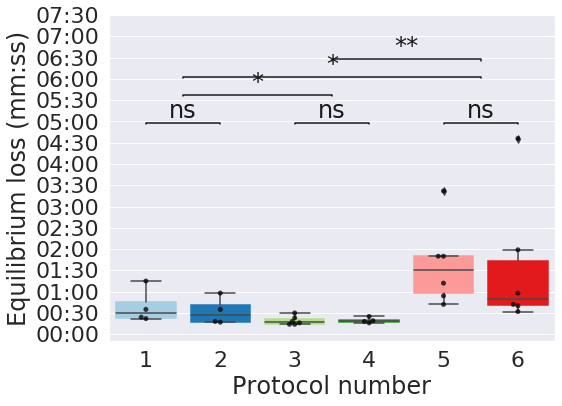

In [9]:
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)
protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
P1and2_df= pd.concat([protocol1_df, protocol2_df])

protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
P3and4_df= pd.concat([protocol3_df, protocol4_df])

protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
P5and6_df= pd.concat([protocol5_df, protocol6_df])

a=P1and2_df['Equilibrium_loss']
b=P3and4_df['Equilibrium_loss']
c=P5and6_df['Equilibrium_loss']

tips = df
ax=sns.boxplot(x="Protocol_number", y="Equilibrium_loss", data=tips)
# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="Equilibrium_loss", data=tips, color='black', alpha=0.75)
ax.set(ylim=(-10, 450))

colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)


ax.set(xlabel='Protocol number', ylabel='Equilibrium loss (mm:ss)')
t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2 and 3 and 4")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(b,c)
print("Protocols '3 and 4' and '5 and 6'")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(a,c)
print("Protocols 5 and 6 and 1 and 2")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)


for i in range(3):
# statistical annotation
    x1 = i*2+0.5
    x2 = i*2+2.5 # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Equilibrium_loss'].max() + 60, 2, 'k'
    
    if i < 1:
       p=p2
     
    elif i == 1:
       p=p3
       y+=50
    else: 
       p=p4
       x1=0.5
       x2=4.5
       y=y+25
    
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')

a=protocol1_df['Equilibrium_loss']
b=protocol2_df['Equilibrium_loss']
c=protocol3_df['Equilibrium_loss']
d=protocol4_df['Equilibrium_loss']
e=protocol5_df['Equilibrium_loss']
f=protocol6_df['Equilibrium_loss']

tips = df.dropna(how='all')
t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f)
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

list=[]  
#In minutes
inc=max([np.int(np.round(tips['Equilibrium_loss'].max()/600)),1])
additional_space=3*inc
y_lim_max=np.int(np.round(tips['Equilibrium_loss'].max()/60))+additional_space
#In seconds
y_actual_max=y_lim_max*60
#additional space for extra plotting at the top (*'s etc.)
if y_lim_max>9:
        #If greater than 9 then change the increment size.
    if y_lim_max>=60:
            #If greater than 60 then the time formatting needs to change
        for time in np.arange(y_lim_max, step=inc):
            if time>=60:
                if 60-time<9:
                    list.append('01:0'+str(np.int(time-60))+':00')
                else:
                    list.append('01:'+str(np.int(time-60))+':00')
            elif time>9:
                list.append('00:'+str(np.int(time))+':00')
            else:
                list.append('00:0'+str(np.int(time))+':00')
    else:
        for time in np.arange(y_lim_max, step=inc):
            if time>9:
                list.append(str(time)+':00')
            else:
                list.append('0'+str(time)+':00')
            plt.yticks(np.arange(y_actual_max, step=inc*60), list)
elif y_lim_max>1:
    #For small values add :30 increments.
    for time in np.arange(y_lim_max, step=1):
        list.append('0'+str(time)+':00')
        list.append('0'+str(time)+':30')
    plt.yticks(np.arange(y_actual_max, step=30), list)
else: # Less than 1 minute
    for time in np.arange(y_lim_max*60, step=10):
        list.append('00:'+str(time))                
    plt.yticks(np.arange(y_actual_max, step=10), list)       
    
for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Equilibrium_loss'].max() + 20, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)


plt.show()

Protocols 1 and 2 and 3 and 4
t = 3.3492913065770593
p = 0.004073371794681756
Protocols '3 and 4' and '5 and 6'
t = -5.7034871812131245
p = 1.395906840704823e-05
Protocols 5 and 6 and 1 and 2
t = -3.576988168120593
p = 0.0021547031442756643
Protocols 1 and 2
t = 0.9165875635859188
p = 0.39470652315212523
Protocols 3 and 4
t = -0.10728835615716421
p = 0.9172020573999646
Protocols 5 and 6
t = -0.19336389469775989
p = 0.8505450016055524


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

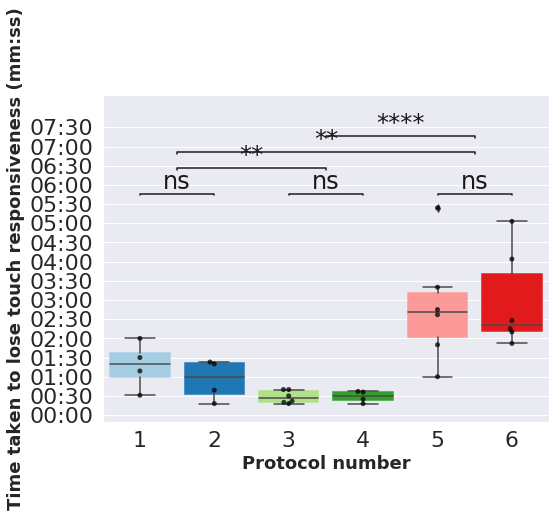

In [10]:
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)
protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
P1and2_df= pd.concat([protocol1_df, protocol2_df])

protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
P3and4_df= pd.concat([protocol3_df, protocol4_df])

protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
P5and6_df= pd.concat([protocol5_df, protocol6_df])

a=P1and2_df['Loss_of_touch_response']
b=P3and4_df['Loss_of_touch_response']
c=P5and6_df['Loss_of_touch_response']

tips = df
ax=sns.boxplot(x="Protocol_number", y="Loss_of_touch_response", data=tips)
# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="Loss_of_touch_response", data=tips, color='black', alpha=0.75)
ax.set(ylim=(-10, 500))

colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)



ax.set(xlabel='Protocol number', ylabel='Loss of touch response (mm:ss)')
t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2 and 3 and 4")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(b,c)
print("Protocols '3 and 4' and '5 and 6'")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(a,c)
print("Protocols 5 and 6 and 1 and 2")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)


for i in range(3):
# statistical annotation
    x1 = i*2+0.5
    x2 = i*2+2.5 # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Loss_of_touch_response'].max() + 60, 2, 'k'
    
    if i < 1:
       p=p2
     
    elif i == 1:
       p=p3
       y+=50
    else: 
       p=p4
       x1=0.5
       x2=4.5
       y=y+25
    
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')

a=protocol1_df['Loss_of_touch_response']
b=protocol2_df['Loss_of_touch_response']
c=protocol3_df['Loss_of_touch_response']
d=protocol4_df['Loss_of_touch_response']
e=protocol5_df['Loss_of_touch_response']
f=protocol6_df['Loss_of_touch_response']

tips = df.dropna(how='all')
t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f)
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

list=[]  
#In minutes
inc=max([np.int(np.round(tips['Loss_of_touch_response'].max()/600)),1])
additional_space=3*inc
y_lim_max=np.int(np.round(tips['Loss_of_touch_response'].max()/60))+additional_space
#In seconds
y_actual_max=y_lim_max*60
#additional space for extra plotting at the top (*'s etc.)
if y_lim_max>9:
        #If greater than 9 then change the increment size.
    if y_lim_max>=60:
            #If greater than 60 then the time formatting needs to change
        for time in np.arange(y_lim_max, step=inc):
            if time>=60:
                if 60-time<9:
                    list.append('01:0'+str(np.int(time-60))+':00')
                else:
                    list.append('01:'+str(np.int(time-60))+':00')
            elif time>9:
                list.append('00:'+str(np.int(time))+':00')
            else:
                list.append('00:0'+str(np.int(time))+':00')
    else:
        for time in np.arange(y_lim_max, step=inc):
            if time>9:
                list.append(str(time)+':00')
            else:
                list.append('0'+str(time)+':00')
            plt.yticks(np.arange(y_actual_max, step=inc*60), list)
elif y_lim_max>1:
    #For small values add :30 increments.
    for time in np.arange(y_lim_max, step=1):
        list.append('0'+str(time)+':00')
        list.append('0'+str(time)+':30')
    plt.yticks(np.arange(y_actual_max, step=30), list)
else: # Less than 1 minute
    for time in np.arange(y_lim_max*60, step=10):
        list.append('00:'+str(time))                
    plt.yticks(np.arange(y_actual_max, step=10), list)       
        
    
for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['Loss_of_touch_response'].max() + 20, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

ax.set_xlabel('Protocol number', weight='bold').set_fontsize('18')
ax.set_ylabel('Time taken to lose touch responsiveness (mm:ss)', weight='bold').set_fontsize('18')
    
plt.savefig('Loss_TR.png',bbox_inches='tight')
plt.savefig('Loss_TR.eps',bbox_inches='tight')
plt.show()

Protocols 1 and 2 and 3 and 4
t = 3.7616637356333245
p = 0.001705255558659161
Protocols '3 and 4' and '5 and 6'
t = -2.0308263243329203
p = 0.05577950390729434
Protocols 5 and 6 and 1 and 2
t = 2.3516288245768218
p = 0.03027977726088844
Protocols 1 and 2
t = -0.5594291837142111
p = 0.5961177641859254
Protocols 3 and 4
t = nan
p = nan
Protocols 5 and 6
t = -0.06605932727299003
p = 0.9486326175171809


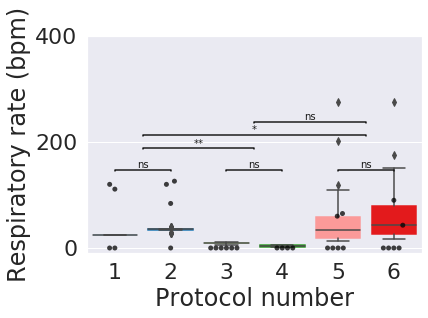

In [16]:

# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

import seaborn as sns, matplotlib.pyplot as plt

protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
P1and2_df= pd.concat([protocol1_df, protocol2_df])

protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
P3and4_df= pd.concat([protocol3_df, protocol4_df])

protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')
P5and6_df= pd.concat([protocol5_df, protocol6_df])

a=P1and2_df['RR_5M']
b=P3and4_df['RR_5M']
c=P5and6_df['RR_5M']

tips = df
ax=sns.boxplot(data=tips)

# add swarmplot
ax=sns.swarmplot(x="Protocol_number", y="RR_5M", data=tips, color='black', alpha=0.75)
ax.set(ylim=(-10, 400))

ax.set(xlabel='Protocol number', ylabel='Respiratory rate (bpm)')

t2, p2 = stats.ttest_ind(a,b)
print("Protocols 1 and 2 and 3 and 4")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(b,c)
print("Protocols '3 and 4' and '5 and 6'")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(a,c)
print("Protocols 5 and 6 and 1 and 2")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

s = stars(p2)


for i in range(3):
# statistical annotation
    x1 = i*2+0.5
    x2 = i*2+2.5 # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['RR_5M'].max() + 60, 2, 'k'
    
    if i < 1:
       p=p2
     
    elif i == 1:
       p=p3
       y+=50
    else: 
       p=p4
       x1=0.5
       x2=4.5
       y=y+25
    
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)

protocol1_df=df.query('Protocol_number==1')
protocol2_df=df.query('Protocol_number==2')
protocol3_df=df.query('Protocol_number==3')
protocol4_df=df.query('Protocol_number==4')
protocol5_df=df.query('Protocol_number==5')
protocol6_df=df.query('Protocol_number==6')

a=protocol1_df['RR_5M']
b=protocol2_df['RR_5M']
c=protocol3_df['RR_5M']
d=protocol4_df['RR_5M']
e=protocol5_df['RR_5M']
f=protocol6_df['RR_5M']

tips = df.dropna(how='all')
t2, p2 = stats.ttest_ind(a,b, nan_policy='omit')
print("Protocols 1 and 2")
print("t = " + str(t2))
print("p = " + str(p2))
t3, p3 = stats.ttest_ind(c,d, nan_policy='omit')
print("Protocols 3 and 4")
print("t = " + str(t3))
print("p = " + str(p3))
t4, p4 = stats.ttest_ind(e,f, nan_policy='omit')
print("Protocols 5 and 6")
print("t = " + str(t4))
print("p = " + str(p4))

def stars(p):
   if p < 0.0001:
       return "****"
   elif (p < 0.001):
       return "***"
   elif (p < 0.01):
       return "**"
   elif (p < 0.05):
       return "*"
   else:
       return "ns"

    
    
for i in range(3):
# statistical annotation
    x1 = i*2
    x2 = i*2+1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
    y, h, col = tips['RR_5M'].max() + 20, 2, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if i < 1:
       p=p2
    elif i == 1:
       p=p3
    else: 
       p=p4
    plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)
colors = sns.color_palette('Paired',n_colors=6)

for artist,color in zip(ax.artists,colors):
    artist.set_facecolor(color)
    artist.set_edgecolor(color)
    
plt.savefig('RR_5M.png',bbox_inches='tight')
plt.show()

##### 